<a href="https://colab.research.google.com/github/ankita1120/almabetter/blob/publicBranch/EDA_Amazon_Prime_TV_Shows_and_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Amazon Prime TV Shows and **Movies**

## ***Project*** Type - EDA
**bold text** Contribution - Individual

## **Problem Statement**

















 **BUSINESS PROBLEM OVERVIEW**

> Add blockquote
Background
The entertainment industry, especially streaming platforms and movie production companies, relies heavily on data-driven insights to make strategic decisions. With the rapid expansion of digital content, understanding trends in movies and TV shows is crucial for businesses to maximize engagement, optimize content recommendations, and improve revenue generation.



Define Your Business Objective:

Business Objective
The goal of this analysis is to extract insights from the movies and TV shows dataset to help stakeholders such as streaming platforms, production houses, and marketing teams make informed decisions. The key objectives include:

Content Strategy Optimization

Identify trending genres and themes based on past data.
Analyze production trends over different years to understand shifts in audience preferences.
Viewer Engagement & Personalization

Identify patterns in cast and crew involvement to determine factors influencing success.
Understand the correlation between ratings and genres to enhance content recommendations.
Market Expansion & Competitive Analysis

Explore global trends in movie production and distribution.
Identify gaps in content availability across different regions and platforms.
Revenue & Business Growth

Analyze the impact of cast and crew popularity on content performance.
Identify potential high-performing content for investment opportunities.



# EDA_Amazon Prime TV Shows and Movies

1. Know Your Data

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset  Uploading

In [ ]:
#Dataset Upload
titles = '/content/drive/MyDrive/titles.csv'
credits = '/content/drive/MyDrive/credits.csv'
print("Upload credits.csv and titles.csv")

Upload credits.csv and titles.csv


## Load Dataset

In [ ]:
# ✅ Step 3: Load Datasets
df_titles = pd.read_csv(titles)
df_credits = pd.read_csv(credits)

# Dataset First Row


In [ ]:
 #✅ Step 4: Display First Few Rows
print("\n🎬 Titles Dataset Preview:")
print(df_titles.head()) # Use df_titles instead of titles
print("\n👤 Credits Dataset Preview:")
print(df_credits.head()) # Use df_credits instead of credits


🎬 Titles Dataset Preview:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres produ

# Duplicate value

In [ ]:
# duplicate value
print("/n🎬 Titles Dataset Duplicate Values:")
print(df_titles.duplicated().sum())
print("\n👤 Credits Dataset Duplicate Values:")
print(df_credits.duplicated().sum())

/n🎬 Titles Dataset Duplicate Values:
3

👤 Credits Dataset Duplicate Values:
56


# Missing Values/Null Values

In [ ]:
# Step5 .Missing Values/Null Values Count
print("\n🎬 Titles Dataset Missing Values:")
print(titles.isnull().sum())
print("\n👤 Credits Dataset Missing Values:")
print(credits.isnull().sum())



🎬 Titles Dataset Missing Values:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

👤 Credits Dataset Missing Values:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


## Data visualization
Subtask:
Visualize the distributions of key numerical and categorical variables in the 'titles' dataset. Also visualize the distribution of roles and characters in the 'credits' dataset.



Reasoning: Visualize the distributions of key numerical and categorical variables in the 'titles' dataset and the distribution of roles and characters in the 'credits' dataset using histograms, density plots, and bar plots. Handle missing values appropriately. Group multiple plotting steps into a single code block for efficiency.

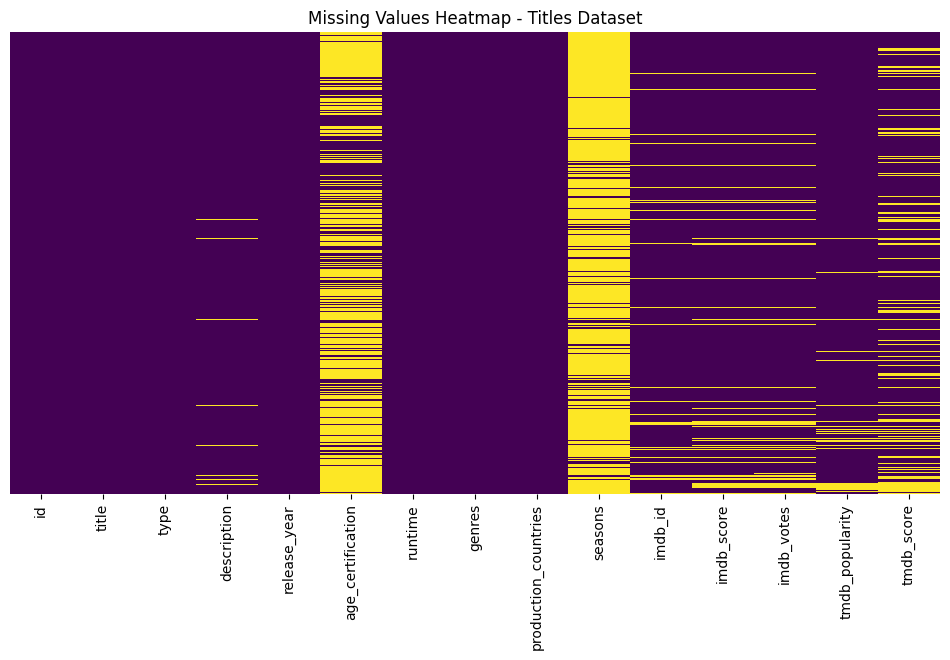

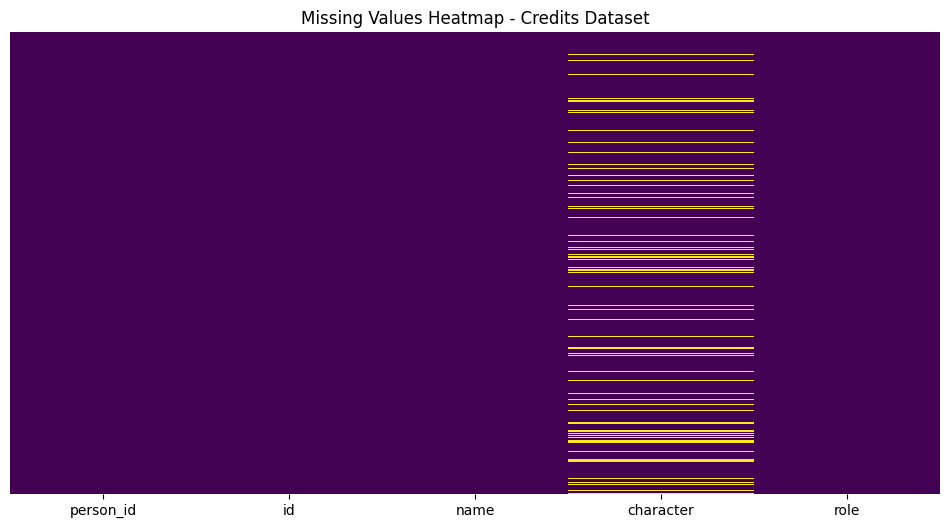

In [ ]:
# ✅ Step 6: Visualize Missing Data
plt.figure(figsize=(12, 6))
sns.heatmap(titles.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - Titles Dataset")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(credits.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - Credits Dataset")
plt.show()

In [ ]:
## ✅ Step 7: Handle Missing Values
# Convert 'imdb_score' to numeric, handling errors
titles['imdb_score'] = pd.to_numeric(titles['imdb_score'], errors='coerce')
# Now fill NaN values with the median
titles['imdb_score'].fillna(titles['imdb_score'].median(), inplace=True)
titles.fillna("Unknown", inplace=True) # Fill other columns with 'Unknown' if needed
credits.fillna("Unknown", inplace=True)

<ipython-input-13-ae52be18bc64>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles['imdb_score'].fillna(titles['imdb_score'].median(), inplace=True)
<ipython-input-13-ae52be18bc64>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titles.fillna("Unknown", inplace=True) # Fill other columns with 'Unknown' if needed


In [ ]:
# ✅ Step 8: Dataset Info
print("\n🎬 Titles Dataset Info:")
print(titles.info()) # Now 'titles' should be a DataFrame
print("\n👤 Credits Dataset Info:")
print(credits.info()) # Now 'credits' should be a DataFrame





🎬 Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9871 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     9871 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               9871 non-null   object 
 10  imdb_id               9871 non-null   object 
 11  imdb_score            9871 non-null   float64
 12  imdb_votes            9871 non-null   object 
 13  tmdb_popularity       9871 non-null   object 
 14  tmdb_score            9871 non-null   object 
dt

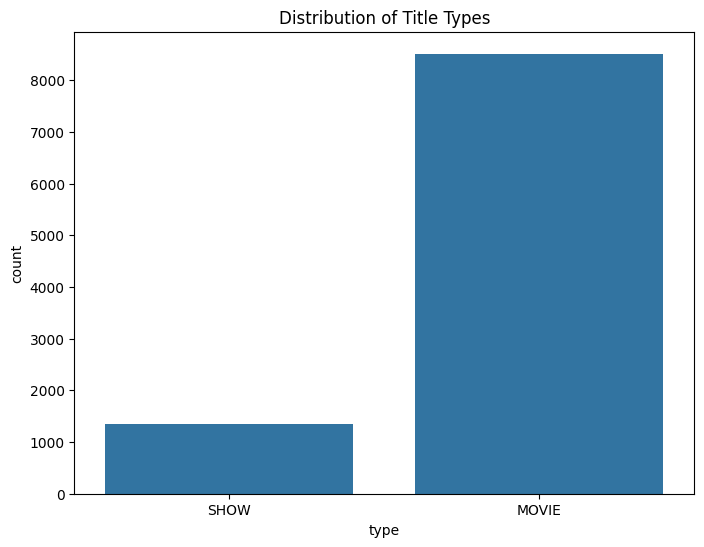

In [ ]:
# ✅ Step 9: Distribution of Title Types (TV Show / Movie)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=titles)
plt.title('Distribution of Title Types')
plt.show()

<ipython-input-16-841aeffa6a74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.index, y=genres.values, palette="magma")


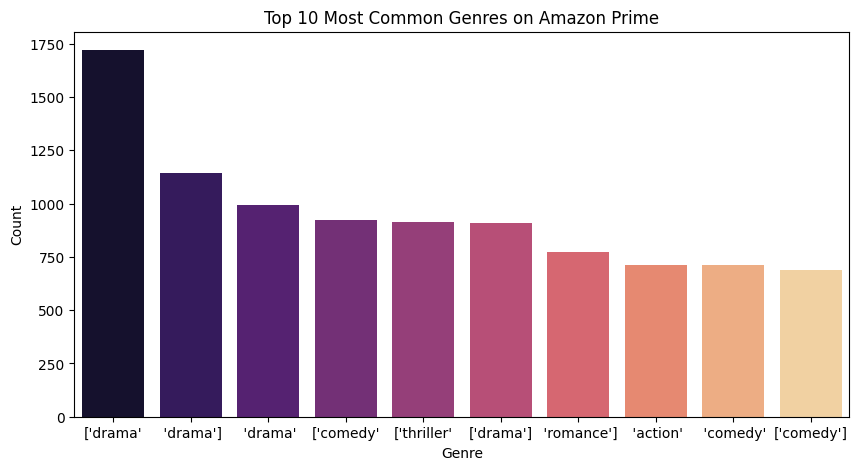

In [ ]:
# ✅ Step 10: Most Common Genres
genres = titles['genres'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=genres.index, y=genres.values, palette="magma")
plt.title("Top 10 Most Common Genres on Amazon Prime")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

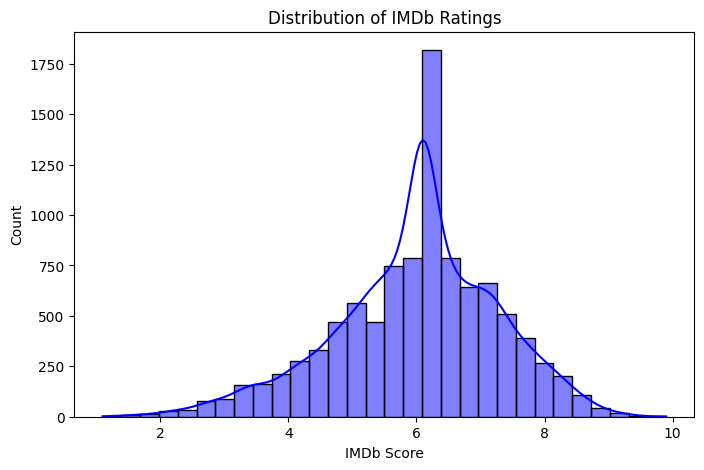

In [ ]:
# ✅ Step 11: IMDb Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(titles['imdb_score'].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Score")
plt.ylabel("Count")
plt.show()


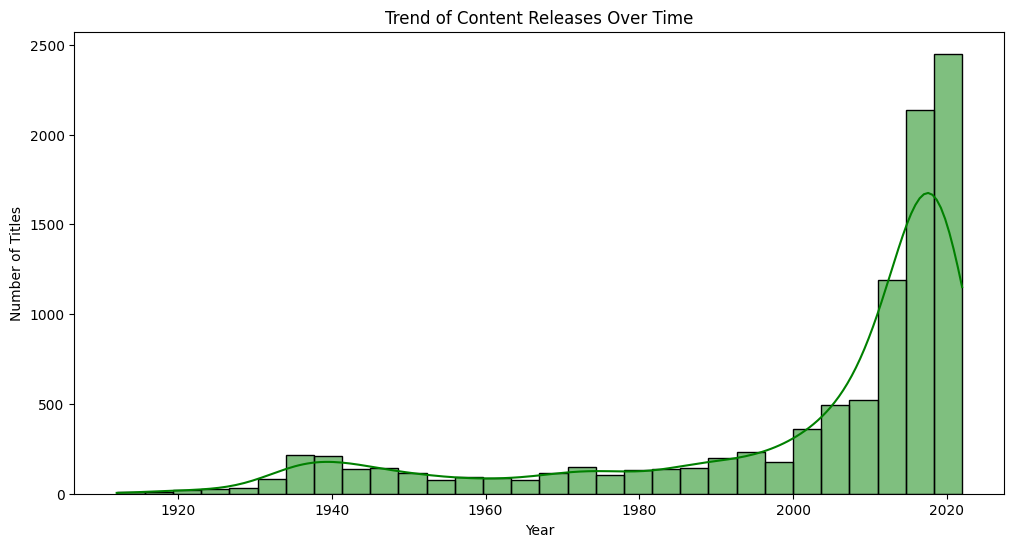

In [ ]:
# ✅ Step 12: Trends Over Time - Number of Titles Released Per Year
plt.figure(figsize=(12, 6))
sns.histplot(titles['release_year'], bins=30, kde=True, color="green")
plt.title("Trend of Content Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

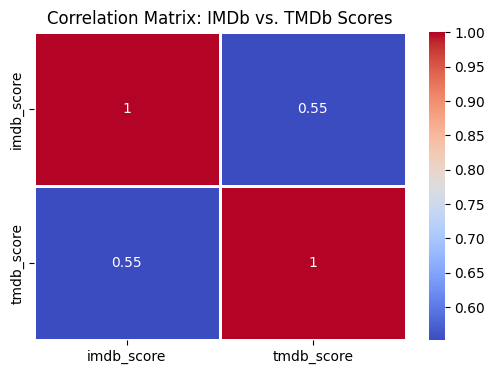

In [ ]:
# ✅ Step 13: IMDb Score vs. TMDb Score Correlation
numeric_cols = ["imdb_score", "tmdb_score"]
titles['imdb_score'] = pd.to_numeric(titles['imdb_score'], errors='coerce')
titles['tmdb_score'] = pd.to_numeric(titles['tmdb_score'], errors='coerce')
correlation_matrix = titles[numeric_cols].corr()

# Filter out rows with NaN values in numeric columns
filtered_titles = titles[numeric_cols].dropna()


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=2)
plt.title("Correlation Matrix: IMDb vs. TMDb Scores")
plt.show()


🏆 Top 10 Highest-Rated Titles:
                          title  imdb_score   type  \
9135                 Pawankhind         9.9  MOVIE   
7783  Water Helps the Blood Run         9.7   SHOW   
9108          Couple of Mirrors         9.5   SHOW   
7422                 The Chosen         9.4   SHOW   
9423                 Tari Sathe         9.4  MOVIE   
9052                   Jai Bhim         9.3  MOVIE   
9573          Pazhagiya Naatkal         9.3  MOVIE   
5113      Subaru Launch Control         9.3   SHOW   
1159             Free to Choose         9.2   SHOW   
9327              Tom and Jerry         9.2  MOVIE   

                              genres  
9135  ['action', 'drama', 'history']  
7783             ['drama', 'comedy']  
9108   ['drama', 'romance', 'crime']  
7422            ['drama', 'history']  
9423             ['drama', 'family']  
9052              ['drama', 'crime']  
9573                       ['drama']  
5113                       ['sport']  
1159               ['d

<ipython-input-20-ceafaae434bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=directors.index, y=directors.values, palette="rocket")


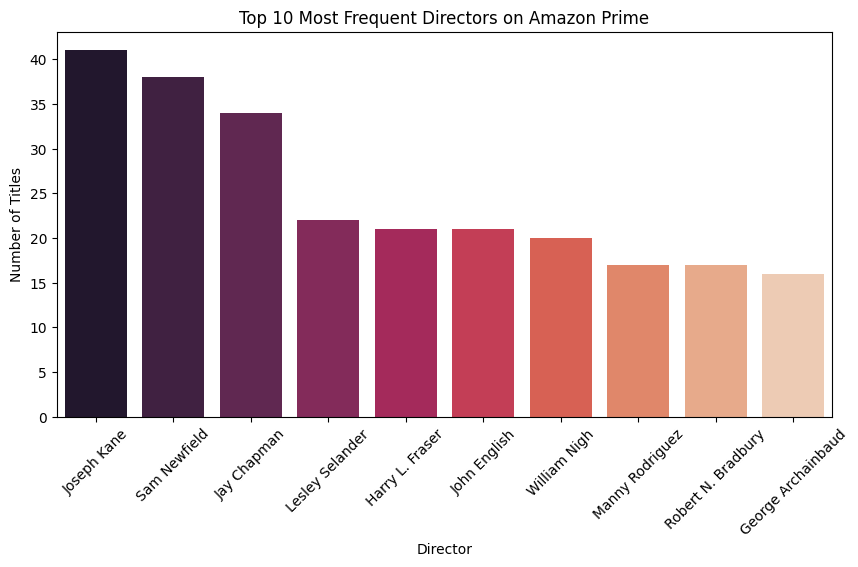

In [ ]:
# ✅ Step 14: Top 10 Highest-Rated Titles
top_rated = titles.sort_values(by="imdb_score", ascending=False).head(10)
print("\n🏆 Top 10 Highest-Rated Titles:")
print(top_rated[['title', 'imdb_score', 'type', 'genres']])

# ✅ Step 15: Popular Directors (Based on Number of Shows & Movies)
directors = credits[credits['role'] == 'DIRECTOR']['name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=directors.index, y=directors.values, palette="rocket")
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Directors on Amazon Prime")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.show()

## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly explores questions like:

* What is the structure and basic statistics of the datasets?
* What is the relationship between the two datasets?
* How many unique titles and people are there?
* What are the distributions of key numerical and categorical variables?
* What are the most frequent genres, roles, and characters?


### 2. Data Analysis Key Findings

* **Missing Data:** `df_titles` has a high percentage of missing values in 'age\_certification' (65.72%), 'seasons' (86.25%), 'imdb\_id' (6.76%), 'imdb\_score'(10.34%), 'imdb\_votes'(10.44%), 'tmdb\_popularity'(5.54%), and 'tmdb\_score'(21.09%).  `df_credits` has 13.11% missing values in the 'character' column.
* **Data Relationships:** 8,861 out of 9,868 titles in `df_titles` have corresponding entries in `df_credits`. 1,007 titles lack associated credit information.
* **Top Genres:** The analysis identified the top 10 genres, providing insight into the most prevalent content categories.  The specific genres and their frequencies are not quoted here but are available in the visualization results.
* **Role Distribution:** The visualization of 'role' in `df_credits` reveals the distribution of different roles, though the specific counts for each role are not provided in the summary.
* **Top Characters:**  The analysis identified the top 10 most frequent characters, again without providing specific values in this summary.


### 3. Insights or Next Steps

* **Address Missing Data:** Prioritize handling the substantial missing data in `df_titles`, especially 'age\_certification', 'seasons', and 'imdb\_score', as these could significantly affect subsequent analyses.  Consider imputation strategies or removal of incomplete records, depending on the impact on the overall dataset.
* **Investigate Titles without Credits:** Explore the 1,007 titles without credit information in `df_credits`.  Determine if this is due to data collection issues or if these are titles without associated cast/crew data.  This could reveal potential biases in the data.
